In [27]:
pip install statsmodels


[notice] A new release of pip is available: 24.0 -> 24.1.1
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [28]:
pip install scikit-learn


[notice] A new release of pip is available: 24.0 -> 24.1.1
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [29]:
import pandas as pd
import numpy as np
from statsmodels.formula.api import ols
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split

In [30]:
bikes = pd.read_csv('https://raw.githubusercontent.com/delinai/schulich_ds1/main/Datasets/bikes_sharing.csv')

In [31]:
bikes.head()
# datetime = when rentals are done (in hour increments)
# season = 1 starts at winter
# holiday = 1 - yes while 2 is no
# working day = M-F
# weather = scale of 1-4 with 1 being least extreme
# temp = temperature
#atemp = feels like temp
#casual = casual renters
# registered = registered renters

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [32]:
bikes.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


In [33]:
# feature engineering
# create daily version of data set
# convert to datetime column into datetime data type with datetime function
# with the pd.to_datetime() function we can make the change
bikes['datetime'] = pd.to_datetime(bikes['datetime'])

In [34]:
# set datetime as index value
bikes_daily = bikes.set_index('datetime')

In [35]:
# resample to daily
bikes_daily = bikes_daily.resample('D').aggregate({'season':'max', 'holiday':'max','workingday':'max', 'weather':'max',\
                                                   'temp':'mean', 'atemp':'mean', 'humidity':'mean', 'windspeed':'mean',\
                                                    'casual':'sum', 'registered':'sum', 'count':'sum'})

In [37]:
bikes_daily

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
datetime,,,,,,,,,,,
2011-01-01,1.0,0.0,0.0,3.0,14.110833,18.181250,80.583333,10.749871,331,654,985
2011-01-02,1.0,0.0,0.0,3.0,14.902609,17.686957,69.608696,16.652122,131,670,801
2011-01-03,1.0,0.0,1.0,1.0,8.050909,9.470227,43.727273,16.636709,120,1229,1349
2011-01-04,1.0,0.0,1.0,2.0,8.200000,10.606087,59.043478,10.739809,108,1454,1562
2011-01-05,1.0,0.0,1.0,1.0,9.305217,11.463478,43.695652,12.522300,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...
2012-12-15,4.0,0.0,0.0,2.0,13.290833,16.919167,65.041667,7.125450,767,4280,5047
2012-12-16,4.0,0.0,0.0,3.0,14.862500,18.496875,83.875000,6.749692,538,3248,3786
2012-12-17,4.0,0.0,1.0,3.0,16.126667,20.075000,90.708333,6.583308,212,4373,4585


In [41]:
# isolate the hour of the day
bikes['hour'] = bikes['datetime'].apply(lambda x: x.hour)
bikes

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,hour
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32,2
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13,3
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336,19
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241,20
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168,21
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129,22


In [51]:
# time of day
def time_of_day(x):
    if x >=6 and x<=9:
        return 'morning_commute'
    elif x > 9 and x <=15:
        return 'midday'
    elif x > 15 and x<=19:
        return 'evening_commute'
    else:
        return 'afterhours'

In [52]:
bikes['time_of_day'] = bikes['hour'].apply(time_of_day)
bikes

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,hour,time_of_day,weekday
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16,0,afterhours,5
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40,1,afterhours,5
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32,2,afterhours,5
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13,3,afterhours,5
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1,4,afterhours,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336,19,evening_commute,2
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241,20,afterhours,2
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168,21,afterhours,2
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129,22,afterhours,2


In [53]:
# isolate day to weekdays or not
# note panda records 0 as Monday and 6 as Sunday
bikes['weekday'] = bikes['datetime'].apply(lambda x: x.weekday())
bikes

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,hour,time_of_day,weekday
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16,0,afterhours,5
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40,1,afterhours,5
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32,2,afterhours,5
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13,3,afterhours,5
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1,4,afterhours,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336,19,evening_commute,2
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241,20,afterhours,2
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168,21,afterhours,2
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129,22,afterhours,2


In [48]:
import seaborn as sns
import matplotlib.pyplot as plt

/var/folders/9f/nqg4_8yj1gvfb5sdf02txd9w0000gn/T/ipykernel_60528/573289501.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='weekday', y='casual', data=bikes, ax=ax1, palette='tab10')
/var/folders/9f/nqg4_8yj1gvfb5sdf02txd9w0000gn/T/ipykernel_60528/573289501.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='weekday', y='registered', data=bikes, ax=ax2, palette='tab10')
/var/folders/9f/nqg4_8yj1gvfb5sdf02txd9w0000gn/T/ipykernel_60528/573289501.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='weekday', y='count', data=bikes, ax

<Axes: xlabel='weekday', ylabel='count'>

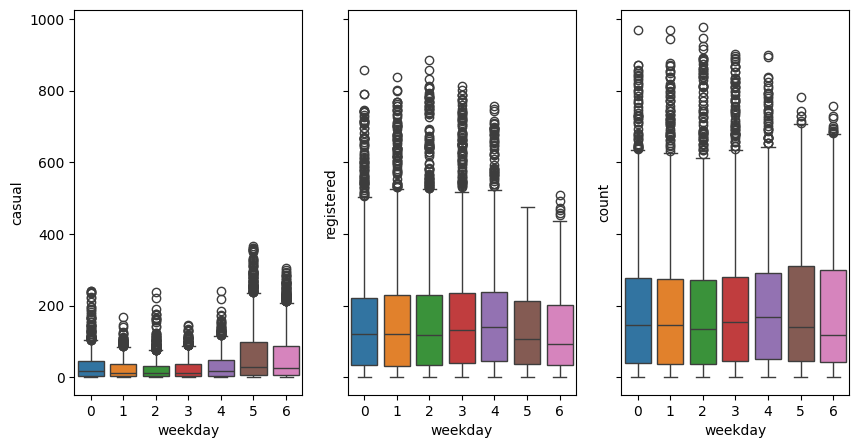

In [57]:
# evaluate weekday vs casual or registered or total rentals as boxplot
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize = (10,5), sharey=True)
ax2.set_ylabel('registered')
ax3.set_ylabel('count')
sns.boxplot(x='weekday', y='casual', data=bikes, ax=ax1, palette='tab10')
sns.boxplot(x='weekday', y='registered', data=bikes, ax=ax2, palette='tab10')
sns.boxplot(x='weekday', y='count', data=bikes, ax=ax3, palette='tab10')


/var/folders/9f/nqg4_8yj1gvfb5sdf02txd9w0000gn/T/ipykernel_60528/3333495364.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='time_of_day', y='casual', data=bikes, ax=ax1, palette='tab10')
/var/folders/9f/nqg4_8yj1gvfb5sdf02txd9w0000gn/T/ipykernel_60528/3333495364.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='time_of_day', y='registered', data=bikes, ax=ax2, palette='tab10')
/var/folders/9f/nqg4_8yj1gvfb5sdf02txd9w0000gn/T/ipykernel_60528/3333495364.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='time_of_day', y='count',

<Axes: xlabel='time_of_day', ylabel='count'>

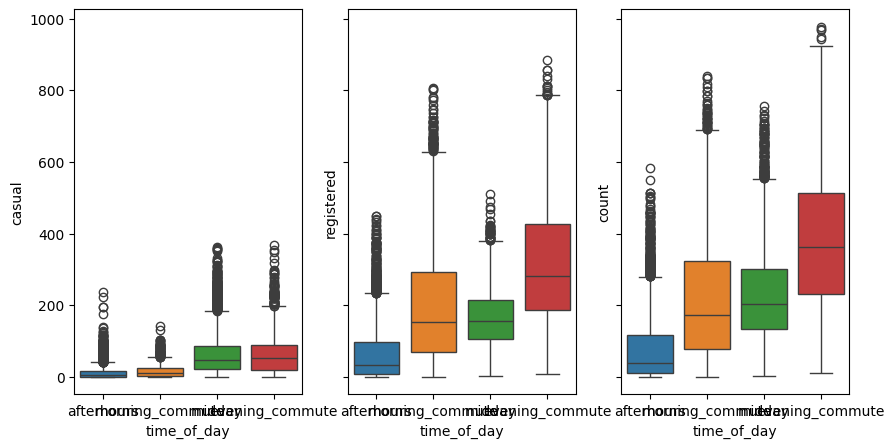

In [58]:
# evaluate time of day 
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize = (10,5), sharey=True)
ax2.set_ylabel('registered')
ax3.set_ylabel('count')
sns.boxplot(x='time_of_day', y='casual', data=bikes, ax=ax1, palette='tab10')
sns.boxplot(x='time_of_day', y='registered', data=bikes, ax=ax2, palette='tab10')
sns.boxplot(x='time_of_day', y='count', data=bikes, ax=ax3, palette='tab10')

<Axes: xlabel='weekday', ylabel='count'>

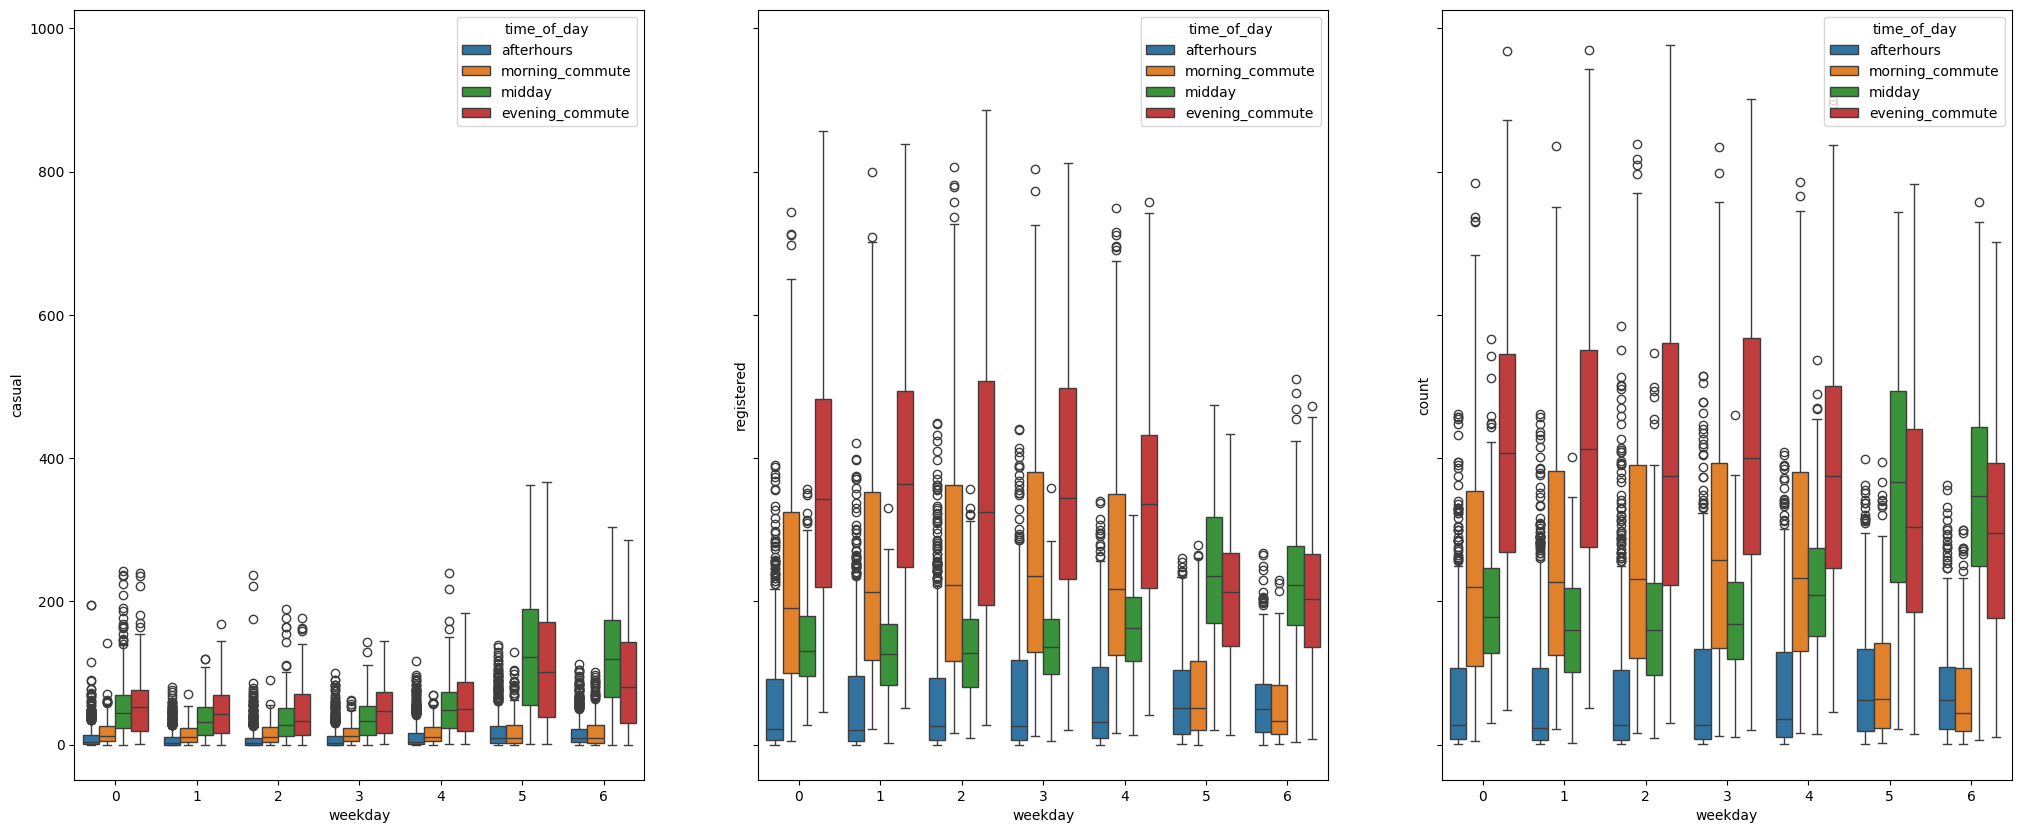

In [61]:
# evaluate weekday & time_of_day vs number of casual or registered or total rentals
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize = (25,10), sharey=True)
ax2.set_ylabel('registered')
ax3.set_ylabel('count')
sns.boxplot(x='weekday', y='casual', hue='time_of_day',data=bikes, ax=ax1, palette='tab10')
sns.boxplot(x='weekday', y='registered', hue='time_of_day',data=bikes, ax=ax2, palette='tab10')
sns.boxplot(x='weekday', y='count', hue='time_of_day',data=bikes, ax=ax3, palette='tab10')

<Axes: xlabel='temp', ylabel='count'>

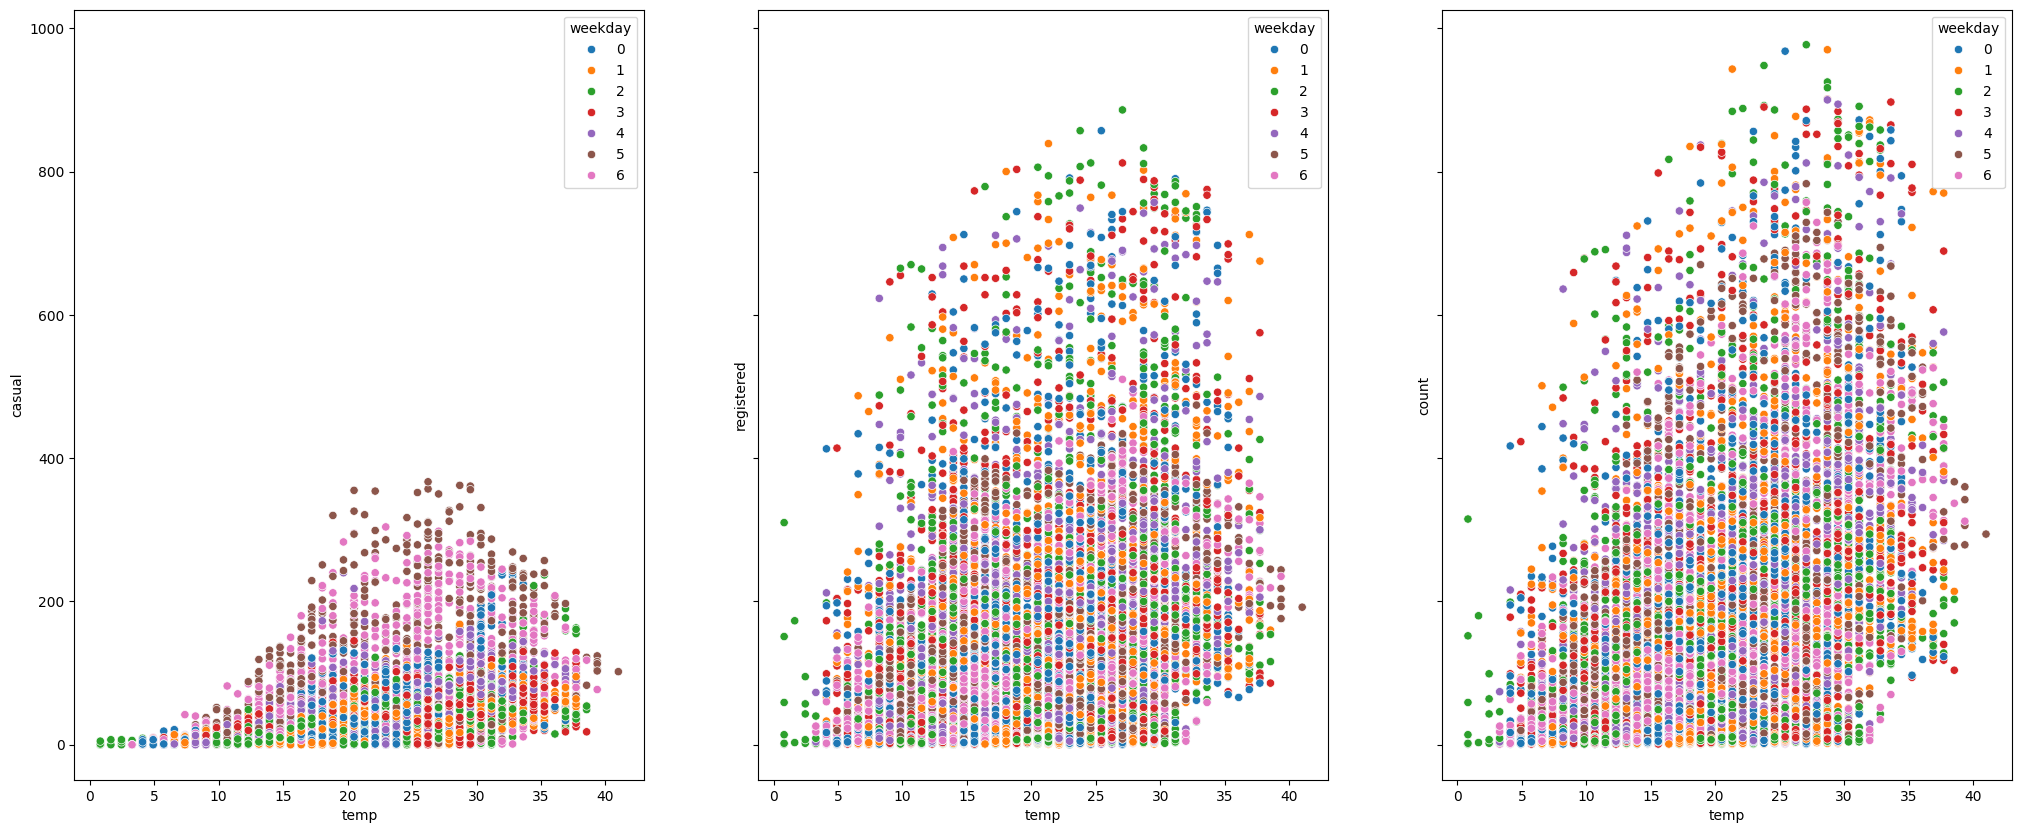

In [63]:
# temperature vs rental counts (scatterplot)
# evaluate weekday & time_of_day vs number of casual or registered or total rentals
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize = (25,10), sharey=True)
ax2.set_ylabel('registered')
ax3.set_ylabel('count')
sns.scatterplot(x='temp', y='casual', hue='weekday',data=bikes, ax=ax1, palette='tab10')
sns.scatterplot(x='temp', y='registered', hue='weekday', data=bikes, ax=ax2, palette='tab10')
sns.scatterplot(x='temp', y='count', hue='weekday', data=bikes, ax=ax3, palette='tab10')

In [66]:
bikes[bikes['time_of_day']=='evening_commute']['casual'].describe()

count    1824.000000
mean       65.248904
std        57.820172
min         0.000000
25%        19.000000
50%        54.000000
75%        90.250000
max       367.000000
Name: casual, dtype: float64

In [75]:
# temp, weekday, time_of_day
# for categoricals, they need to be converted into dummy variables
# get_dummies() does this
model_data = pd.get_dummies(data = bikes[['casual','temp','weekday','time_of_day']], columns=['weekday','time_of_day'], dtype=int)
model_data.head()

,casual,temp,weekday_0,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,time_of_day_afterhours,time_of_day_evening_commute,time_of_day_midday,time_of_day_morning_commute
0,3,9.84,0,0,0,0,0,1,0,1,0,0,0
1,8,9.02,0,0,0,0,0,1,0,1,0,0,0
2,5,9.02,0,0,0,0,0,1,0,1,0,0,0
3,3,9.84,0,0,0,0,0,1,0,1,0,0,0
4,0,9.84,0,0,0,0,0,1,0,1,0,0,0


In [74]:
model_data.columns

Index(['casual', 'temp', 'weekday_0', 'weekday_1', 'weekday_2', 'weekday_3',
       'weekday_4', 'weekday_5', 'weekday_6', 'time_of_day_afterhours',
       'time_of_day_evening_commute', 'time_of_day_midday',
       'time_of_day_morning_commute'],
      dtype='object')

In [76]:
model = ols("casual ~ temp +  weekday_1 + weekday_2 + weekday_3 + \
       weekday_4 + weekday_5 + weekday_6  + \
            time_of_day_evening_commute + time_of_day_midday + time_of_day_morning_commute", data=model_data).fit()
print(model.summary())
# note: r-squared model defines quality of model; the closer to 1 the better
# if you have a bad variable then the adjusted will be lower
# coefficient = y=mx+b function;
# it means that for example under temp that for every degree of temperature there will be 2.48 more bikes rented 
# and for every weekday 1 ie. tuesday there will be 7.2 fewer rentals

                            OLS Regression Results                            
Dep. Variable:                 casual   R-squared:                       0.510
Model:                            OLS   Adj. R-squared:                  0.510
Method:                 Least Squares   F-statistic:                     1134.
Date:                Wed, 26 Jun 2024   Prob (F-statistic):               0.00
Time:                        21:05:01   Log-Likelihood:                -54136.
No. Observations:               10886   AIC:                         1.083e+05
Df Residuals:                   10875   BIC:                         1.084e+05
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept         

In [78]:
model.params

Intercept                     -41.363774
temp                            2.485440
weekday_1                      -7.223317
weekday_2                      -6.583888
weekday_3                      -4.894790
weekday_4                       2.741512
weekday_5                      36.262129
weekday_6                      28.697654
time_of_day_evening_commute    44.038322
time_of_day_midday             46.215897
time_of_day_morning_commute     5.686747
dtype: float64

In [82]:
predictions = model.predict(model_data.iloc[:, 1:])
predictions
# the predict function is using all the coefficients to create an output for all the data rows

0        19.355088
1        17.317027
2        17.317027
3        19.355088
4        19.355088
           ...    
10881    34.813821
10882   -11.262562
10883   -13.300624
10884   -13.300624
10885   -15.338685
Length: 10886, dtype: float64

In [84]:
final_data = pd.concat([model_data, predictions], axis=1)
final_data.rename(columns={0:'predictions'}, inplace=True)
final_data

,casual,temp,weekday_0,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,time_of_day_afterhours,time_of_day_evening_commute,time_of_day_midday,time_of_day_morning_commute,predictions
0,3,9.84,0,0,0,0,0,1,0,1,0,0,0,19.355088
1,8,9.02,0,0,0,0,0,1,0,1,0,0,0,17.317027
2,5,9.02,0,0,0,0,0,1,0,1,0,0,0,17.317027
3,3,9.84,0,0,0,0,0,1,0,1,0,0,0,19.355088
4,0,9.84,0,0,0,0,0,1,0,1,0,0,0,19.355088
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,7,15.58,0,0,1,0,0,0,0,0,1,0,0,34.813821
10882,10,14.76,0,0,1,0,0,0,0,1,0,0,0,-11.262562
10883,4,13.94,0,0,1,0,0,0,0,1,0,0,0,-13.300624
10884,12,13.94,0,0,1,0,0,0,0,1,0,0,0,-13.300624


In [85]:
final_data['residuals'] = final_data['predictions'] - final_data['casual']
predictions = model.predict(model_data.iloc[:,1:])

<Axes: xlabel='predictions', ylabel='residuals'>

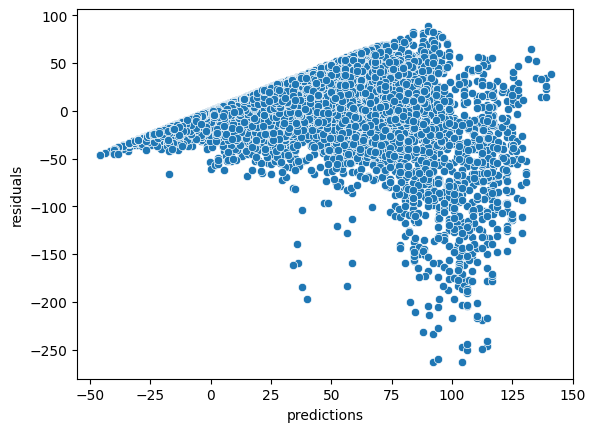

In [86]:
sns.scatterplot(x='predictions', y='residuals', data=final_data)

<Axes: xlabel='residuals', ylabel='Count'>

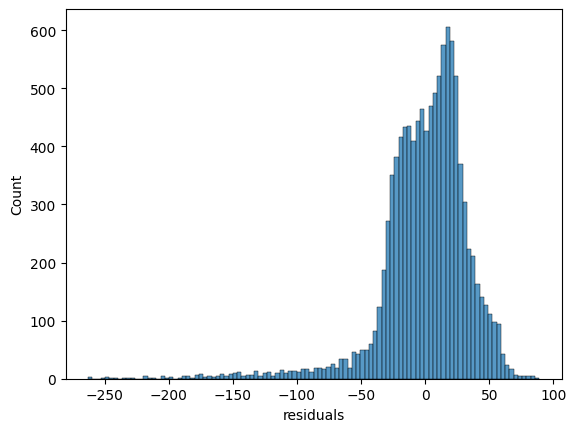

In [87]:
# check for normal distribution of residuals
sns.histplot(final_data['residuals'])

# this shows that this model is not a fit for the data

In [88]:
import statsmodels.api as sm

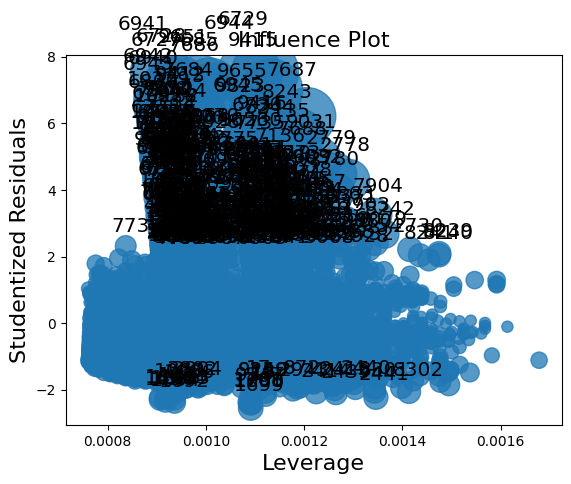

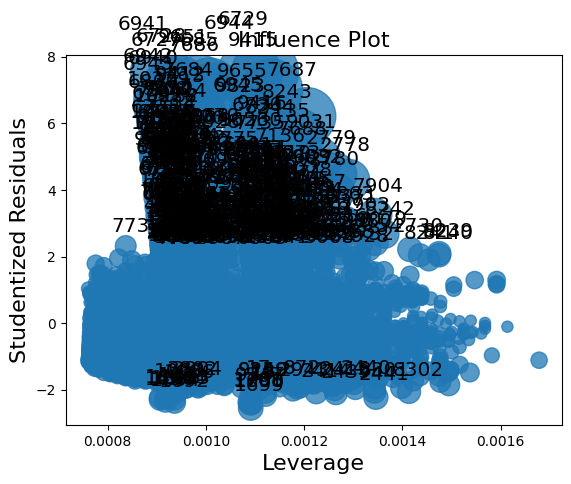

In [89]:
# to identify influential plots as outliers
# outliers would be on the top right; in this case there are none so there are no outlier influential
# plots with this dataset
sm.graphics.influence_plot(model, criterion = 'cooks')

In [90]:
# tells us how far the predictive values are from the actual ones
np.mean(np.sqrt(final_data['residuals']**2))

24.37005700126345

In [91]:
np.mean(final_data.casual)

36.02195480433584